In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import math
import gzip
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#from utils_atac import BuildMatrix, printMatrix, binarize, get_matrix, get_nodeDegree_ForEachNode, get_NodeDegree, get_confidentLinks
#from bed_manipulate import bed_intersection, bed_w_NoIntersection, bed_closest

In [3]:
DATADIR='/users/mtaranov/datasets_3d/notebooks'
DATADIR='/mnt/lab_data/kundaje/mtaranov/ChicagoCalls/'
InteractionsFilePP=DATADIR+'D0_D2D8_merge_BaitToBait_intra.bed.gz'
InteractionsFilePE=DATADIR+'D0_D2D8_merge_BaitToE_intra.bed.gz'

In [95]:
def get_pos_neg_at_dist(InteractionsFiles, thres_min, thres_max, bin_size, score_thres):
    bins = [i/bin_size for i in range(thres_min, thres_max, bin_size)]
    pos={}
    neg={}
    for bin in bins:
        pos.update({int(bin):[]})
        neg.update({int(bin):[]})
    for InteractionsFileCaptureC in InteractionsFiles:
        for line in gzip.open(InteractionsFileCaptureC,'r'):
            words=line.rstrip().split()
            chr1=words[0]
            start1=float(words[1])
            end1=float(words[2])
            chr2=words[3]
            start2=float(words[4])
            end2=float(words[5])
            score=float(words[6])
            d=abs((end2+start2)/2-(end1+start1)/2)
            if thres_min < d <= thres_max:
                bin = int(math.floor(d/bin_size))
                if score == 0:
                    neg[bin].append(score)
                else:
                    if score >= score_thres:
                        pos[bin].append(score)
    return pos, neg

In [97]:
def get_pos_neg_at_dist(InteractionsFiles, thres_min, thres_max, bin_size, score_thres):
    bins = [i/bin_size for i in range(thres_min, thres_max, bin_size)]
    pos={}
    neg={}
    unlbd={}
    for bin in bins:
        pos.update({int(bin):[]})
        neg.update({int(bin):[]})
        unlbd.update({int(bin):[]})
    for InteractionsFileCaptureC in InteractionsFiles:
        for line in gzip.open(InteractionsFileCaptureC,'r'):
            words=line.rstrip().split()
            chr1=words[0]
            start1=float(words[1])
            end1=float(words[2])
            chr2=words[3]
            start2=float(words[4])
            end2=float(words[5])
            score=float(words[6])
            d=abs((end2+start2)/2-(end1+start1)/2)
            if thres_min < d <= thres_max:
                bin = int(math.floor(d/bin_size))
                if score == 0:
                    neg[bin].append(score)
                else:
                    if score >= score_thres:
                        pos[bin].append(score)
                    else:
                        unlbd[bin].append(score)
    return pos, neg, unlbd

# PP

In [106]:
thres_min, thres_max, bin_size, score_thres = 10000, 2000000, 50000, 10
pos, neg, unlbd = get_pos_neg_at_dist([InteractionsFilePP], thres_min, thres_max, bin_size, score_thres)

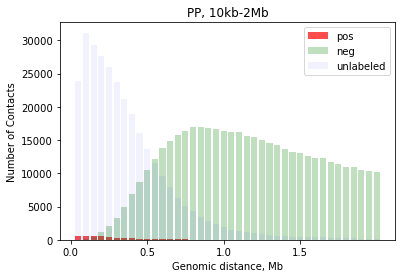

In [107]:
import matplotlib.ticker as ticker
plt.bar(pos.keys(), [len(i) for i in pos.values()], alpha=0.7, color='r',  label='pos')
plt.bar(pos.keys(), [len(i) for i in neg.values()], alpha=0.25, color='g',  label='neg')
plt.bar(pos.keys(), [len(i) for i in unlbd.values()], alpha=0.05, color='b',  label='unlabeled')
plt.xlabel('Genomic distance, Mb')
plt.ylabel('Number of Contacts')
plt.legend(loc='upper right')
plt.title('PP, 10kb-2Mb')
#plt.xticks(x, labels, rotation='vertical')
plt.xticks([i-1 for i in pos.keys()[0::10]], [float(i)/20 for i in pos.keys()[0::10]])
plt.show()

In [108]:
print "pos = ", sum([len(i) for i in pos.values()]), " neg = ", sum([len(i) for i in neg.values()]), " unlbd = ", sum([len(i) for i in unlbd.values()])

pos =  4677  neg =  455312  unlbd =  298256


# PE

In [109]:
thres_min, thres_max, bin_size, score_thres = 10000, 2000000, 50000, 10
pos, neg, unlbd = get_pos_neg_at_dist([InteractionsFilePE], thres_min, thres_max, bin_size, score_thres)

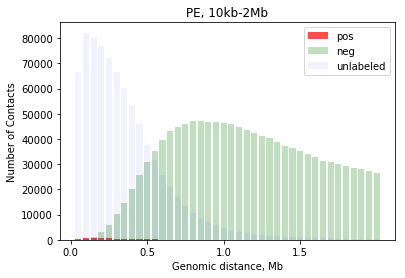

In [110]:
import matplotlib.ticker as ticker
plt.bar(pos.keys(), [len(i) for i in pos.values()], alpha=0.7, color='r',  label='pos')
plt.bar(pos.keys(), [len(i) for i in neg.values()], alpha=0.25, color='g',  label='neg')
plt.bar(pos.keys(), [len(i) for i in unlbd.values()], alpha=0.05, color='b',  label='unlabeled')
plt.xlabel('Genomic distance, Mb')
plt.ylabel('Number of Contacts')
plt.legend(loc='upper right')
plt.title('PE, 10kb-2Mb')
#plt.xticks(x, labels, rotation='vertical')
plt.xticks([i-1 for i in pos.keys()[0::10]], [float(i)/20 for i in pos.keys()[0::10]])
plt.show()

In [111]:
print "pos = ", sum([len(i) for i in pos.values()]), " neg = ", sum([len(i) for i in neg.values()]), " unlbd = ", sum([len(i) for i in unlbd.values()])

pos =  5432  neg =  1260308  unlbd =  812731


# PP+PE

In [112]:
thres_min, thres_max, bin_size, score_thres = 10000, 2000000, 50000, 10
pos, neg, unlbd = get_pos_neg_at_dist([InteractionsFilePP, InteractionsFilePE], thres_min, thres_max, bin_size, score_thres)

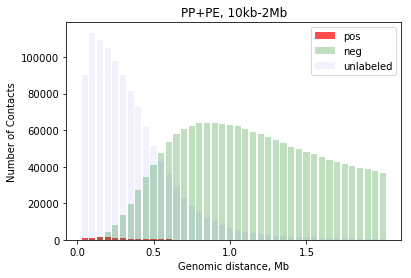

In [113]:
import matplotlib.ticker as ticker
plt.bar(pos.keys(), [len(i) for i in pos.values()], alpha=0.7, color='r',  label='pos')
plt.bar(pos.keys(), [len(i) for i in neg.values()], alpha=0.25, color='g',  label='neg')
plt.bar(pos.keys(), [len(i) for i in unlbd.values()], alpha=0.05, color='b',  label='unlabeled')
plt.xlabel('Genomic distance, Mb')
plt.ylabel('Number of Contacts')
plt.legend(loc='upper right')
plt.title('PP+PE, 10kb-2Mb')
#plt.xticks(x, labels, rotation='vertical')
plt.xticks([i-1 for i in pos.keys()[0::10]], [float(i)/20 for i in pos.keys()[0::10]])
plt.show()

In [114]:
print "pos = ", sum([len(i) for i in pos.values()]), " neg = ", sum([len(i) for i in neg.values()]), " unlbd = ", sum([len(i) for i in unlbd.values()])

pos =  10109  neg =  1715620  unlbd =  1110987
